In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("taxi dataset.csv")
df["datetime"] = pd.to_datetime(df[["year", "month", "day"]]) + pd.to_timedelta(df["hour_of_day"], unit='h')
df.set_index("datetime", inplace=True)

In [3]:
daily_avg = df["total_amount"].resample("D").mean().dropna()


In [4]:
model = ARIMA(daily_avg, order=(5, 1, 0))  # (AR, differencing, MA)
model_fit = model.fit()

In [5]:
forecast = model_fit.forecast(steps=7)


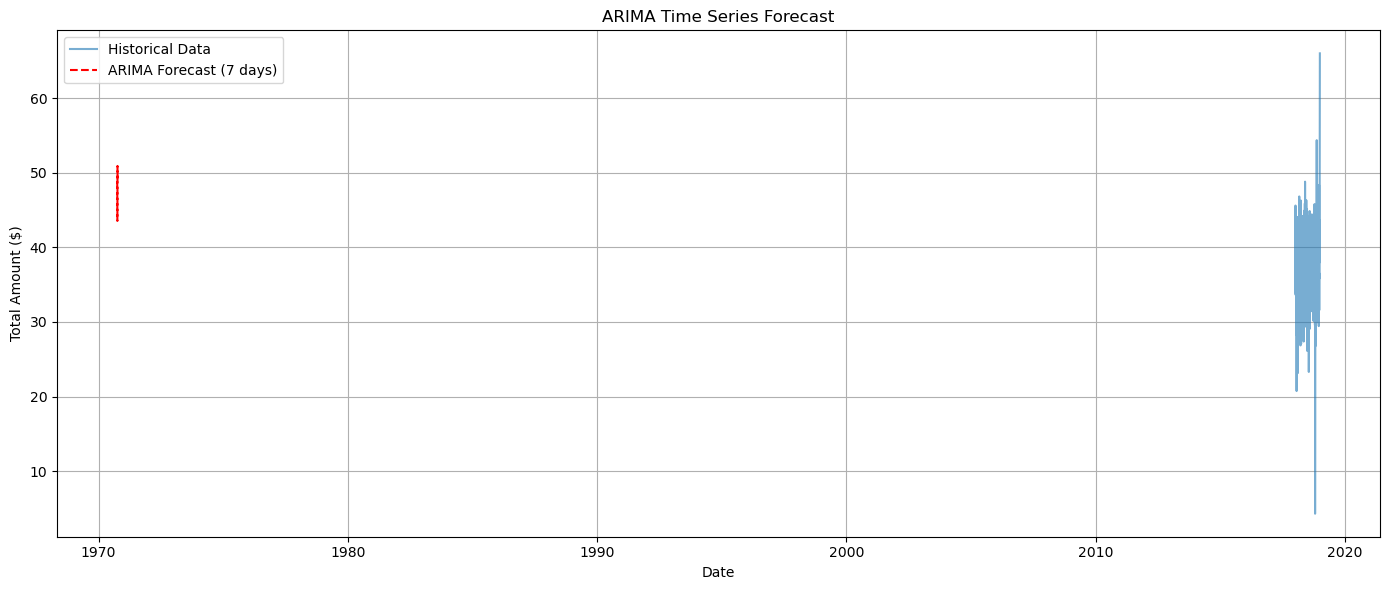

In [6]:
plt.figure(figsize=(14, 6))
plt.plot(daily_avg, label="Historical Data", alpha=0.6)
plt.plot(forecast.index, forecast, label="ARIMA Forecast (7 days)", color='red', linestyle='--')
plt.title("ARIMA Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Total Amount ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()